In [1]:
import pandas as pd
import seaborn as sns

In [2]:
#Rutas de importación y exportación
sldb = pd.read_csv('synergy_logistics_database.csv', index_col=0, parse_dates=[5])
rutas = sldb.groupby(['direction','origin', 'destination', 'transport_mode'])
suma = rutas.sum()['total_value']
rutas = rutas['total_value'].describe()

rutas['suma_total'] = suma
rutas = rutas.reset_index()

exportaciones = rutas[ rutas['direction'] == 'Exports']
importaciones = rutas[rutas['direction'] == 'Imports']

#funcion de export y import
def sol1(df, top=10):
    suma_total_df = df['suma_total'].sum()
    most_used = df.sort_values(by='count', ascending=False).head(top)
    suma_total_top = most_used.suma_total.sum()

    total_usos = most_used['count'].sum()
    porcentaje = (suma_total_top / suma_total_df) * 10000
    porcentaje = int(porcentaje) / 100
    print(f'Las {top} rutas mas demandadas aportan {porcentaje}% de las ganancias, en un total de {total_usos} servicios')
    return most_used

In [3]:
#Resultado de rutas de exportación
print('El caso de las 10 rutas más usadas de Exportación es: ')
grafica_export = sol1(exportaciones)
grafica_export

El caso de las 10 rutas más usadas de Exportación es: 
Las 10 rutas mas demandadas aportan 28.13% de las ganancias, en un total de 3305.0 servicios


,direction,origin,destination,transport_mode,count,mean,std,min,25%,50%,75%,max,suma_total
134,Exports,South Korea,Vietnam,Sea,497.0,1.383704e+07,1.071060e+07,0.0,6000000.0,11000000.0,18000000.0,65000000.0,6877007000
154,Exports,USA,Netherlands,Sea,436.0,2.367401e+06,3.425529e+06,0.0,1000.0,4000.0,4000000.0,23000000.0,1032187000
108,Exports,Netherlands,Belgium,Road,374.0,8.636615e+06,1.787992e+07,0.0,1000.0,3000000.0,7000000.0,229000000.0,3230094000
34,Exports,China,Mexico,Air,330.0,3.712121e+07,2.582412e+07,0.0,19000000.0,35000000.0,52000000.0,140000000.0,12250000000
86,Exports,Japan,Brazil,Sea,306.0,1.100704e+07,1.115415e+07,0.0,1000000.0,8000000.0,17000000.0,52000000.0,3368155000
57,Exports,Germany,France,Road,299.0,9.706401e+06,1.577356e+07,0.0,2000.0,3000000.0,10000000.0,88000000.0,2902214000
131,Exports,South Korea,Japan,Sea,279.0,1.646595e+07,8.336327e+06,2000000.0,10000000.0,15000000.0,20500000.0,45000000.0,4594000000
3,Exports,Australia,Singapore,Sea,273.0,1.805861e+06,1.607325e+06,0.0,1000000.0,1000000.0,2000000.0,12000000.0,493000000
25,Exports,Canada,Mexico,Rail,261.0,3.237548e+07,2.433130e+07,0.0,11000000.0,31000000.0,49000000.0,103000000.0,8450000000
38,Exports,China,Spain,Air,250.0,7.448000e+06,9.225385e+06,0.0,2000000.0,4000000.0,8000000.0,54000000.0,1862000000


In [4]:
#Resultado de rutas de exportación 
print('El caso de las 10 rutas más usadas de Importación es: ')
grafica_import = sol1(importaciones)
grafica_import

El caso de las 10 rutas más usadas de Importación es: 
Las 10 rutas mas demandadas aportan 47.09% de las ganancias, en un total de 1740.0 servicios


,direction,origin,destination,transport_mode,count,mean,std,min,25%,50%,75%,max,suma_total
198,Imports,Singapore,Thailand,Sea,273.0,1.471429e+07,1.216850e+07,1000000.0,4000000.0,14000000.0,20000000.0,69000000.0,4017000000
176,Imports,Germany,China,Sea,233.0,5.699571e+06,4.801656e+06,0.0,2000000.0,5000000.0,8000000.0,23000000.0,1328000000
167,Imports,China,Japan,Air,210.0,1.541429e+07,1.151013e+07,1000000.0,3000000.0,14500000.0,23000000.0,46000000.0,3237000000
184,Imports,Japan,Mexico,Sea,206.0,1.901942e+07,1.764251e+07,0.0,4000000.0,11000000.0,36000000.0,61000000.0,3918000000
190,Imports,Malaysia,Thailand,Rail,195.0,1.785641e+07,1.545128e+07,1000000.0,3000000.0,17000000.0,25000000.0,69000000.0,3482000000
171,Imports,China,Thailand,Road,145.0,1.921379e+07,1.652741e+07,1000000.0,5000000.0,15000000.0,27000000.0,78000000.0,2786000000
203,Imports,Spain,Germany,Road,142.0,1.439437e+07,1.399035e+07,0.0,3000000.0,5500000.0,27750000.0,45000000.0,2044000000
173,Imports,China,United Arab Emirates,Sea,114.0,2.944737e+07,2.043123e+07,1000000.0,6000000.0,34500000.0,46000000.0,85000000.0,3357000000
164,Imports,Brazil,China,Sea,113.0,3.654867e+06,2.701752e+06,0.0,1000000.0,4000000.0,5000000.0,12000000.0,413000000
211,Imports,USA,Thailand,Sea,109.0,1.438532e+07,9.922765e+06,1000000.0,3000000.0,16000000.0,21000000.0,41000000.0,1568000000


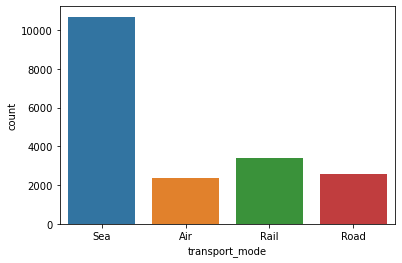

In [5]:
#Medio de trasporte utilizado
#Grafica de barras
sldb = pd.read_csv('synergy_logistics_database.csv', index_col=0, parse_dates=[5])
ax = sns.countplot(x='transport_mode', data=sldb)

<AxesSubplot:xlabel='year', ylabel='frecuencia'>

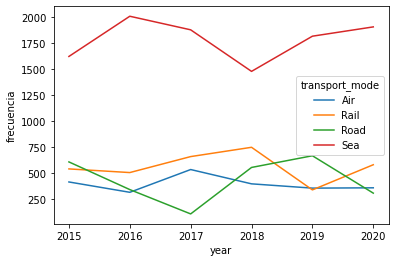

In [6]:
#Medio de trasporte utilizado
#Grafica con la variación por año 

transportes_anuales = sldb.groupby(by=['year', 'transport_mode'])
valor_anual_transporte = transportes_anuales['total_value'].agg(pd.Series.sum)

info_transp_anual = pd.DataFrame()
info_transp_anual['valor_total'] = valor_anual_transporte
info_transp_anual['frecuencia'] = transportes_anuales['total_value'].describe()['count']

sns.lineplot(x='year', y='frecuencia', hue='transport_mode', data=info_transp_anual)

In [7]:
#Valor total de importaciones y exportaciones.
#Porcentajes de ganancias de exportaciones.
print('Países por porcentaje de ganancia en exportación: ')
sldb = pd.read_csv('synergy_logistics_database.csv', index_col=0, parse_dates=[5])
datos = sldb[ sldb['direction'] == 'Exports' ][['origin', 'total_value']]
suma = datos.groupby('origin').sum()
cuenta = datos.groupby('origin').count()
lista = suma.reset_index()
lista = lista.merge(cuenta, left_on='origin', right_index=True)
cols = {'total_value_x':'valor', 'total_value_y':'cant. servicios'}
lista = lista.rename(columns=cols)
lista['porcentaje'] = (lista['valor'] / lista['valor'].sum()) * 100
lista = lista.sort_values(by='valor', ascending=False)
lista['porcentaje acum.'] = lista.cumsum()['porcentaje']
lista

Países por porcentaje de ganancia en exportación: 


,origin,valor,cant. servicios,porcentaje,porcentaje acum.
5,China,32977046000,1657,20.589640,20.589640
6,France,18614332000,919,11.622096,32.211736
18,USA,18355306000,1464,11.460370,43.672105
15,South Korea,14621146000,1134,9.128899,52.801004
13,Russia,13223000000,766,8.255949,61.056953
10,Japan,11948976000,1257,7.460496,68.517449
7,Germany,11343233000,1295,7.082292,75.599741
4,Canada,10684000000,603,6.670692,82.270433
9,Italy,5366684000,562,3.350758,85.621191
12,Netherlands,4120369000,796,2.572605,88.193796


In [8]:
#Valor total de importaciones y exportaciones.
#Porcentajes de ganancias de importaciones.
print('Países por porcentaje de ganancia en importación: ')
datos = sldb[ sldb['direction'] == 'Imports' ][['origin', 'total_value']]
suma = datos.groupby('origin').sum()
cuenta = datos.groupby('origin').count()
lista = suma.reset_index()
lista = lista.merge(cuenta, left_on='origin', right_index=True)
cols = {'total_value_x':'valor', 'total_value_y':'cant. servicios'}
lista = lista.rename(columns=cols)
lista['porcentaje'] = (lista['valor'] / lista['valor'].sum()) * 100
lista = lista.sort_values(by='valor', ascending=False)
lista['porcentaje acum.'] = lista.cumsum()['porcentaje']
lista

Países por porcentaje de ganancia en importación: 


,origin,valor,cant. servicios,porcentaje,porcentaje acum.
3,China,12233000000,615,22.030327,22.030327
7,Japan,8094000000,445,14.576430,36.606757
14,USA,5291000000,376,9.528526,46.135283
9,Mexico,4621000000,366,8.321928,54.457211
5,Germany,4250000000,369,7.653796,62.111007
11,Singapore,4017000000,273,7.234188,69.345195
12,South Korea,3889000000,161,7.003674,76.348869
8,Malaysia,3560000000,199,6.411180,82.760049
13,Spain,3001000000,183,5.404481,88.164530
4,France,1316000000,169,2.369976,90.534505
